In [1]:
import numpy as np
import pandas as pd

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import datetime
import time

sns.set()

In [5]:
df = pd.read_csv("/Users/mervehoroz/Desktop/ISDSA_projects/proje3/taxidata.csv")

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8106756 entries, 0 to 8106755
Data columns (total 29 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   VendorID               int64  
 2   passenger_count        int64  
 3   trip_distance          float64
 4   RatecodeID             int64  
 5   store_and_fwd_flag     object 
 6   PULocationID           int64  
 7   DOLocationID           int64  
 8   payment_type           int64  
 9   fare_amount            float64
 10  extra                  float64
 11  mta_tax                float64
 12  tip_amount             float64
 13  tolls_amount           float64
 14  improvement_surcharge  float64
 15  total_amount           float64
 16  congestion_surcharge   float64
 17  Taxi                   object 
 18  trip_duration          object 
 19  pickup_day             int64  
 20  pickup_dayofweek       int64  
 21  pickup_nameofday       object 
 22  pick_hour         

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,8106756.0,4.053794e+06,2.340270e+06,0.000000,2.027059e+06,4.053804e+06,6.080509e+06,8.107334e+06
VendorID,8106756.0,1.662480e+00,5.292745e-01,1.000000,1.000000e+00,2.000000e+00,2.000000e+00,4.000000e+00
passenger_count,8106756.0,1.572168e+00,1.205840e+00,1.000000,1.000000e+00,1.000000e+00,2.000000e+00,9.000000e+00
trip_distance,8106756.0,2.876037e+00,3.772331e+00,0.010000,9.400000e-01,1.590000e+00,2.910000e+00,8.318000e+02
RatecodeID,8106756.0,1.068382e+00,5.538170e-01,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,9.900000e+01
PULocationID,8106756.0,1.611252e+02,6.845638e+01,1.000000,1.130000e+02,1.610000e+02,2.330000e+02,2.650000e+02
DOLocationID,8106756.0,1.609884e+02,7.142504e+01,1.000000,1.070000e+02,1.620000e+02,2.340000e+02,2.650000e+02
payment_type,8106756.0,1.294026e+00,4.681202e-01,1.000000,1.000000e+00,1.000000e+00,2.000000e+00,5.000000e+00
fare_amount,8106756.0,1.240491e+01,2.191793e+02,0.010000,6.000000e+00,9.000000e+00,1.350000e+01,6.232599e+05
extra,8106756.0,3.268704e-01,4.602130e-01,0.000000,0.000000e+00,0.000000e+00,5.000000e-01,1.850000e+01


In [8]:
df.drop(columns=["Unnamed: 0","tolls_amount","congestion_surcharge"],inplace=True)

(0, 800)

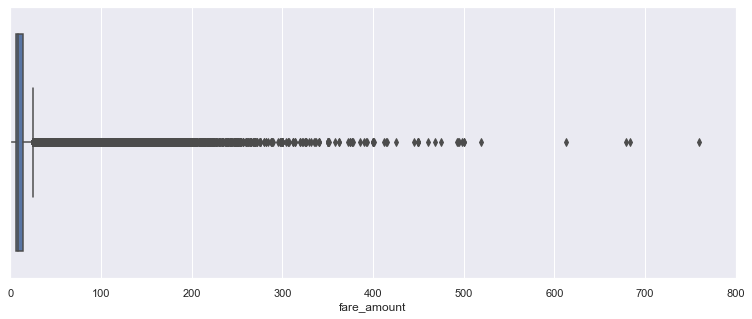

In [9]:
#fare amount outliers!
plt.figure(figsize=[13,5])
ax = sns.boxplot(x=df["fare_amount"])
plt.xlim([0,800])

In [10]:
df = df.loc[(df["fare_amount"] < 350)]

(0, 220)

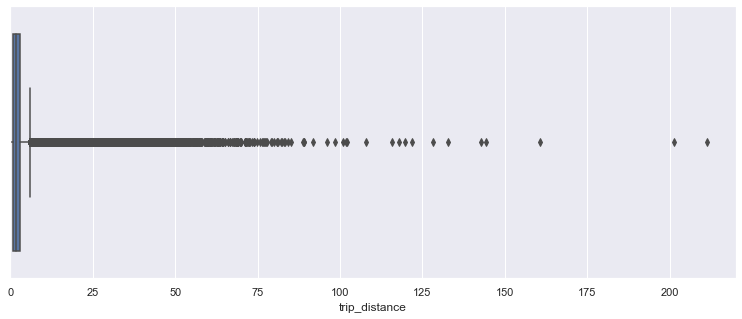

In [11]:
plt.figure(figsize=[13,5])
ax = sns.boxplot(x=df["trip_distance"])
plt.xlim([0,220])

In [10]:
df = df.loc[(df["trip_distance"] < 150)]

(0, 250)

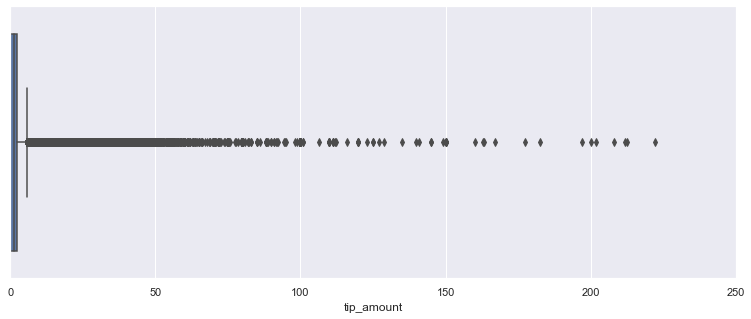

In [11]:
plt.figure(figsize=[13,5])
ax = sns.boxplot(x=df["tip_amount"])
plt.xlim([0,250])

In [12]:
df = df.loc[(df["tip_amount"] < 150)]

(0, 1000)

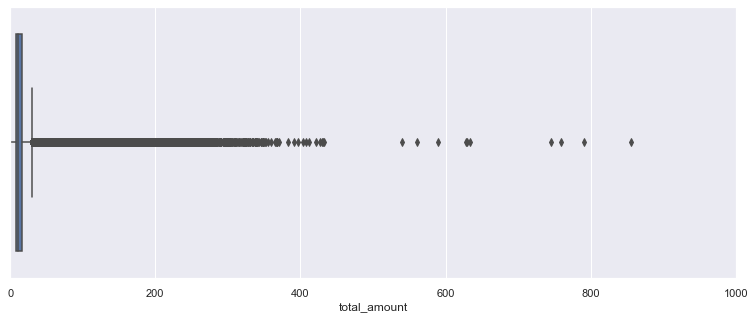

In [13]:
plt.figure(figsize=[13,5])
ax = sns.boxplot(x=df["total_amount"])
plt.xlim([0,1000])

In [14]:
df = df.loc[(df["total_amount"] < 500)]

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorID,8106665.0,1.662480,0.529274,1.000000,1.000000,2.000000,2.000000,4.000000
passenger_count,8106665.0,1.572170,1.205843,1.000000,1.000000,1.000000,2.000000,9.000000
trip_distance,8106665.0,2.875592,3.766889,0.010000,0.940000,1.590000,2.910000,831.800000
RatecodeID,8106665.0,1.068357,0.553736,1.000000,1.000000,1.000000,1.000000,99.000000
PULocationID,8106665.0,161.125268,68.456341,1.000000,113.000000,161.000000,233.000000,265.000000
DOLocationID,8106665.0,160.987830,71.424792,1.000000,107.000000,162.000000,234.000000,265.000000
payment_type,8106665.0,1.294023,0.468114,1.000000,1.000000,1.000000,2.000000,5.000000
fare_amount,8106665.0,12.324320,10.844864,0.010000,6.000000,9.000000,13.500000,341.000000
extra,8106665.0,0.326871,0.460209,0.000000,0.000000,0.000000,0.500000,18.500000
mta_tax,8106665.0,0.498098,0.030809,0.000000,0.500000,0.500000,0.500000,3.800000


In [16]:
#yüzde kaç tip olduğunu inceledik
df["tip_ratio"] = (100 * df["tip_amount"])/df["total_amount"]

<Figure size 864x576 with 0 Axes>

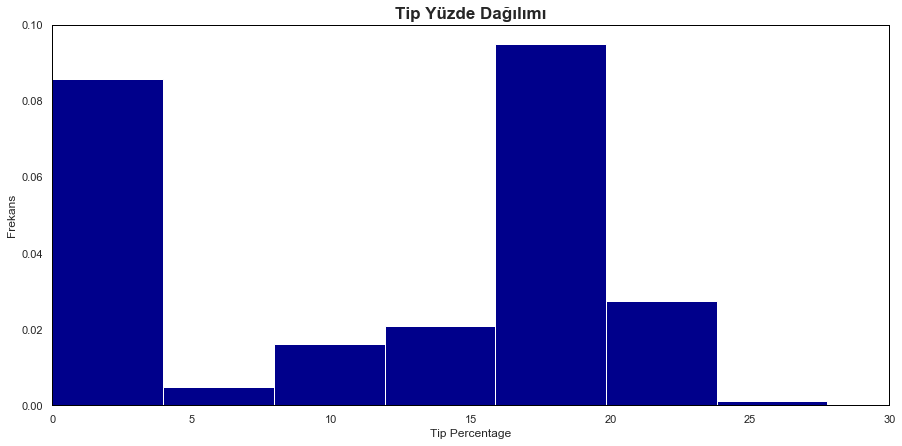

In [17]:
# Tip oranı dağılımı

plt.figure(figsize=(12,8))
sns.set_palette("Set2")
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1

fig, ax = plt.subplots(figsize=[15,7])
ax = df["tip_ratio"].plot.hist(density=True, ax=ax, bins = 30, color = "darkblue")
plt.xlim([0,30])
plt.ylim([0,0.10])
ax.grid("off")
ax.set_facecolor("white")
plt.xlabel("Tip Percentage")
plt.ylabel("Frekans")
plt.title("Tip Yüzde Dağılımı", fontsize = 17,weight="bold")
plt.show()

#plt.savefig("tippercentage.jpeg", dpi = 500)


In [18]:
df.drop(columns=["tip_ratio"], inplace=True)

TARGET oluşturalım!

In [19]:
df["Tip"] = ["Yes" if i !=0 else "No" for i in df["tip_amount"]]

In [20]:
df.drop(columns=["pickup_dayofweek"], inplace=True)

In [22]:
"""plt.figure(figsize=[14,8])
sns.heatmap(df.corr(),annot=True, vmin=-1, vmax=1,  cmap="coolwarm",annot_kws={"size":10})
plt.savefig("heat.jpeg", dpi=600,bbox_inches="tight")"""

'plt.figure(figsize=[14,8])\nsns.heatmap(df.corr(),annot=True, vmin=-1, vmax=1,  cmap="coolwarm",annot_kws={"size":10})\nplt.savefig("heat.jpeg", dpi=600,bbox_inches="tight")'

In [23]:
df.Tip.value_counts()

Yes    5372161
No     2734504
Name: Tip, dtype: int64

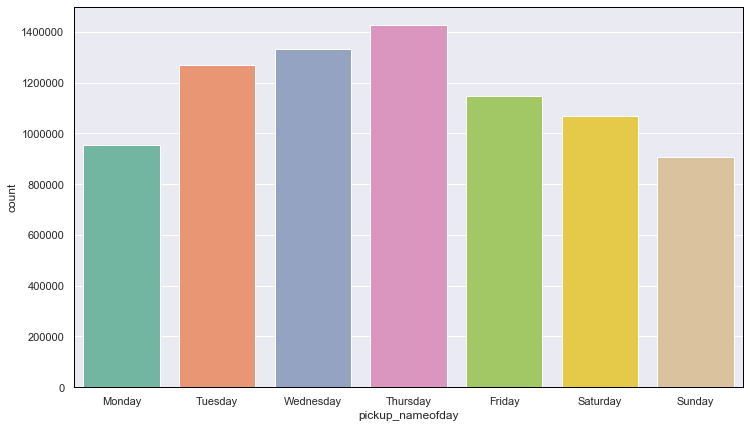

In [24]:
#en çok taksi kullanılan gün
weekday_labels = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']


plt.figure(figsize=[12,7])

sns.countplot(df.pickup_nameofday, order=weekday_labels)


In [25]:
# tip bırakma yüzdesi hangi gün daha fazla?
taxifreq = pd.crosstab(index=df["pickup_nameofday"], columns=df["Tip"])
taxifreq["percentage"] = taxifreq["Yes"]/(taxifreq["No"]+taxifreq["Yes"])
taxifreq

Tip,No,Yes,percentage
pickup_nameofday,,,
Friday,389808,757878,0.660353
Monday,319258,635627,0.665658
Saturday,377527,689962,0.646341
Sunday,314944,590801,0.652282
Thursday,461967,965414,0.676353
Tuesday,428511,842036,0.662735
Wednesday,442489,890443,0.668033


Text(0, 0.5, 'Tip Counts')

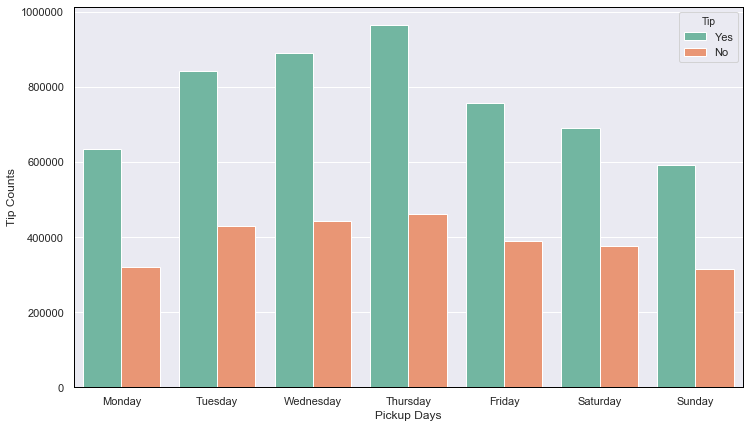

In [26]:
#En çok hangi gün tip alıyoruz ?
plt.figure(figsize=[12,7])

sns.countplot(df.pickup_nameofday, hue=df.Tip, order=weekday_labels)
plt.xlabel("Pickup Days")
plt.ylabel("Tip Counts")


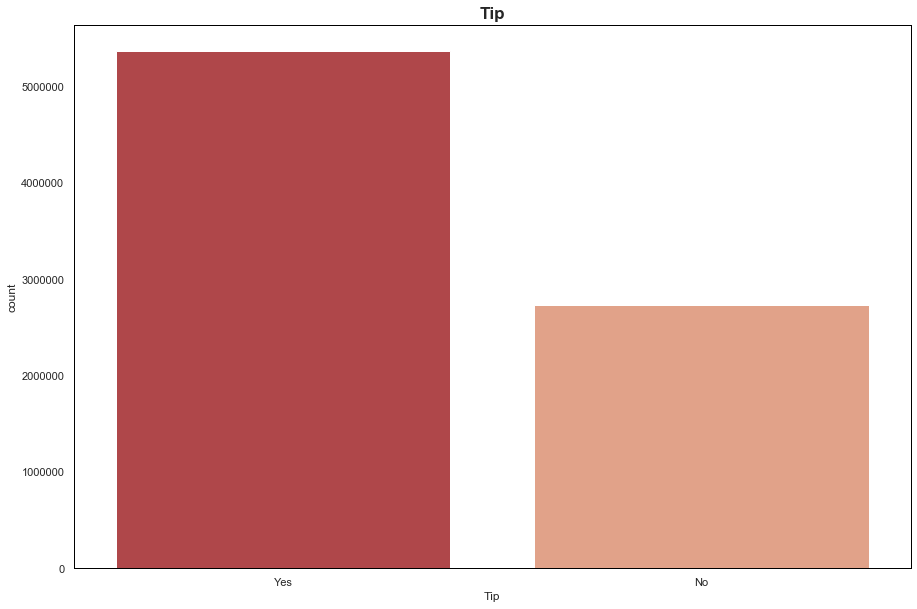

In [27]:
# Tip dengesine bakalım

plt.figure(figsize=[15,10])
sns.set_palette("RdBu")
ax = sns.countplot(df.Tip)
ax.set_facecolor("white")
ax.grid("off")
plt.title("Tip", weight="bold", fontsize = 17)
plt.savefig("tipcount.jpeg", dpi=500)

In [28]:
print('Yes: {}%'.format(round((df['Tip'].value_counts()["Yes"] / df.shape[0]), 2)*100))
print('No: {}%'.format(round((df['Tip'].value_counts()["No"] / df.shape[0]), 2)*100))

Yes: 66.0%
No: 34.0%


# Kolonları Düzenleyelim

__Tarife değerlerini düzeltelim!__

In [29]:
#1= Creative Mobile Technologies, LLC; 2= VeriFone Inc. temsil eder, bu yüzden 4 hatalı veri. 4 olan veri setini moda gore doldurduk.
df.VendorID.value_counts()

2    5141366
1    2888919
4      76380
Name: VendorID, dtype: int64

In [30]:
# eksik verileri doldurduk
df["VendorID"] = df["VendorID"].replace(4,2)

In [31]:
df.RatecodeID.value_counts()

1     7845610
2      157010
5       87565
3       11242
4        5130
99         91
6          17
Name: RatecodeID, dtype: int64

In [32]:
df["RatecodeID"] = df["RatecodeID"].replace(99, 1) #99 eksik değerleri temsil ediyor

In [33]:
def airport(airport):
    if airport == 2  or airport == 3:
        return "1"
    else:
        return "0"

In [34]:
df["airport_trip"] = df.RatecodeID.apply(airport)

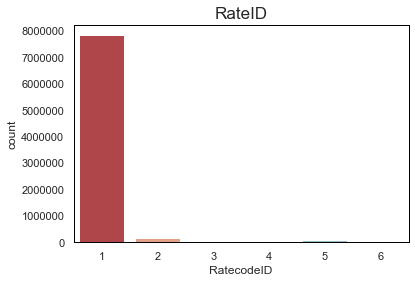

In [35]:
#1. tarife diğerlerine gore çok fazla.

ax = sns.countplot(df.RatecodeID)# 1 ve diğerleri olarak kategorilere ayırabiliriz.
ax.set_facecolor("white")
ax.grid("off")
plt.title("RateID", fontsize = 17)
plt.savefig("rateid.jpeg", dpi = 500)

In [36]:
# 1 : Standart Rate 0 : Others
df["RatecodeID"] = ["1" if i ==1 else "0" for i in df["RatecodeID"]]

__Ödeme Tiperini düzeltelim!__

In [37]:
# 1 : Credit Card. 2 : Cash 3 : Others
df.payment_type.value_counts()

1    5762332
2    2312728
3      24013
4       7573
5         19
Name: payment_type, dtype: int64

In [38]:
result_map = {1: '1', 2: '2'}
df["payment_type"] = [result_map[x] if x in result_map else '3' for x in df["payment_type"]]

__Yolcu sayılarını kategoriye ayırdık!__

In [39]:
df.passenger_count.value_counts()

1    5941202
2    1149492
5     342604
3     320906
6     209582
4     142847
8         18
7          8
9          6
Name: passenger_count, dtype: int64

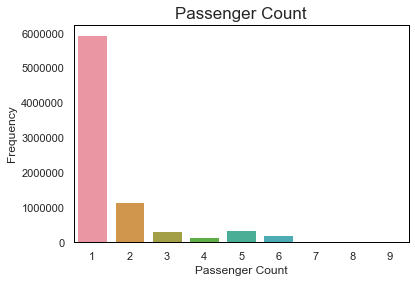

In [40]:

ax = sns.countplot(df.passenger_count)
plt.title("Passenger Count", fontsize=17)
ax.set_facecolor("white")
plt.xlabel("Passenger Count")
plt.ylabel("Frequency")
ax.grid("off")

plt.savefig("passengercount.jpeg", dpi=500, bbox_inches = "tight")

In [41]:
passenger_map = {1: '1', 2: '2-4', 3: '2-4', 4: '2-4'}
df["passenger_count"] = [passenger_map[x] if x in passenger_map else '5-9' for x in df["passenger_count"]]

In [42]:
#Weekday kolonunu düzenledik
weekday = {'Weekday' : 1, 'Weekend' : 0 }
df["pickup_weekday"] = [weekday[x] for x in df["pickup_weekday"]]

In [43]:
#Taxi kolonunu düzenledik
taxi = {"Yellow" : 1, "Green" : 2}
df["Taxi"] = [taxi[x] for x in df["Taxi"]]

 __Rush Hourları belirleyelim.__

In [44]:
def rush_hour(hour):
    if ((hour >= 7 and hour <= 9) or (hour >= 16 and hour <= 18)):
        return "1"
    else:
        return "0"

In [45]:
df["rush_hour"] = df.pick_hour.apply(rush_hour)

__Trip distance kategoriledik.__

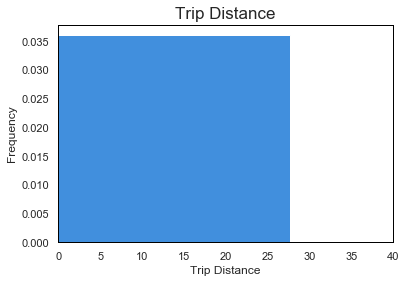

In [46]:
ax = df["trip_distance"].plot.hist(density=True, bins = 30, color="#418FDD")
ax.grid("off")
ax.set_facecolor("white")
plt.title("Trip Distance", fontsize=17)
plt.xlim([0,40])
plt.xlabel("Trip Distance")
plt.savefig("tripdistance.jpeg", dpi=500)



In [47]:
def distance(dist):
    if (dist >=0 and dist <=5):
        return "0-5"
    elif (dist >5 and dist <=10):
        return "5-10"
    else:
        return "10>"

In [48]:
df["trip_distance"] = df.trip_distance.apply(distance)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8106665 entries, 0 to 8106755
Data columns (total 28 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   VendorID               int64  
 1   passenger_count        object 
 2   trip_distance          object 
 3   RatecodeID             object 
 4   store_and_fwd_flag     object 
 5   PULocationID           int64  
 6   DOLocationID           int64  
 7   payment_type           object 
 8   fare_amount            float64
 9   extra                  float64
 10  mta_tax                float64
 11  tip_amount             float64
 12  improvement_surcharge  float64
 13  total_amount           float64
 14  Taxi                   int64  
 15  trip_duration          object 
 16  pickup_day             int64  
 17  pickup_nameofday       object 
 18  pick_hour              int64  
 19  pickup_minute          int64  
 20  pickup_weekday         int64  
 21  Weather                object 
 22  Average           

In [50]:
#Total amount tip ve extraları içeriyor bu degeleri cıkaralım.
df["total_amount"] = df["total_amount"] - df["tip_amount"] - df["extra"]

In [51]:
df.mta_tax.value_counts()

0.50    8075809
0.00      30852
0.35          2
1.00          1
3.80          1
Name: mta_tax, dtype: int64

In [52]:
df.improvement_surcharge.value_counts()

0.3    8057969
0.0      48695
0.6          1
Name: improvement_surcharge, dtype: int64

In [53]:
#bu kolonlar "total amount" kolonuna dahil. Ayrıca tip amount sonucları etkilememesi için çıkardık.
df.drop(columns=["mta_tax","improvement_surcharge","fare_amount","tip_amount"], inplace=True)

In [54]:
df["New Snow"].value_counts()

0.0    7284273
0.4     290388
0.5     281470
0.2     250534
Name: New Snow, dtype: int64

In [55]:
df = df.rename(columns={"New Snow":"new_snow","pick_hour":"pickup_hour"})

In [56]:
df["airport_trip"] = df["airport_trip"].astype(int)
df["rush_hour"] = df["rush_hour"].astype(int)

# EDA

In [57]:
# taksi çeşidine gore hangi takside daha cok tip bırakılmıs
taxifreq = pd.crosstab(index=df["Taxi"], columns=df["Tip"])
taxifreq["percentage"] = taxifreq["Yes"]/(taxifreq["No"]+taxifreq["Yes"])
taxifreq

Tip,No,Yes,percentage
Taxi,,,
1,2331951,5158288,0.688668
2,402553,213873,0.346956


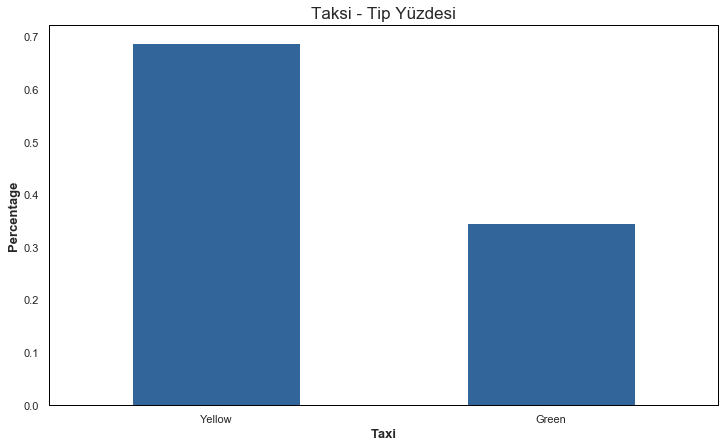

In [58]:

ax = taxifreq.plot(kind="bar", y="percentage", use_index=True, legend=None, color = "#32669b")
plt.gcf().set_size_inches(12, 7)
ax.grid("off")
ax.set_facecolor("white")
plt.xticks(rotation = 360)
ax.set_xticklabels(["Yellow", "Green"])
plt.xlabel("Taxi",fontsize=13, weight = "bold")
plt.ylabel("Percentage",fontsize=13, weight = "bold")
plt.title("Taksi - Tip Yüzdesi", fontsize=17)

plt.savefig("taxiperc.jpeg", dpi=500)

plt.show()

In [59]:
# airport yolculuklarına gore tip bırakılma yüzdesi
airport = pd.crosstab(index=df["airport_trip"], columns=df["Tip"])
airport["percentage"] = airport["Yes"]/(airport["No"]+airport["Yes"])
airport

Tip,No,Yes,percentage
airport_trip,,,
0,2690768,5247645,0.661045
1,43736,124516,0.740057


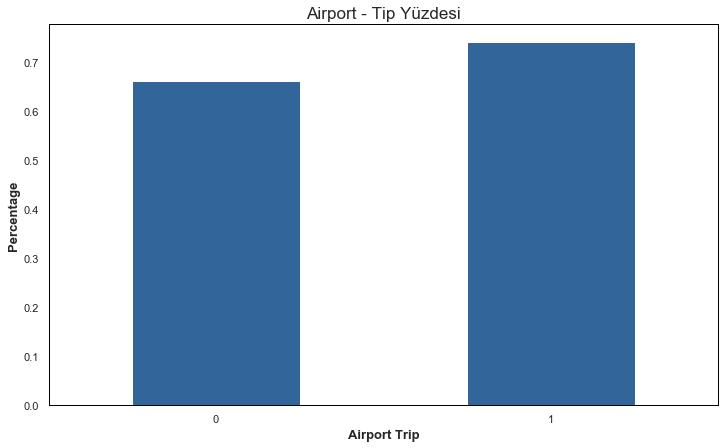

In [60]:
ax = airport.plot(kind="bar", y="percentage", use_index=True, legend=None, color = "#32669b")
plt.gcf().set_size_inches(12, 7)
plt.xticks(rotation = 360)
ax.grid("off")
ax.set_facecolor("white")
plt.xlabel("Airport Trip",fontsize=13, weight = "bold")
plt.ylabel("Percentage",fontsize=13, weight = "bold")
plt.title("Airport - Tip Yüzdesi", fontsize = 17)

plt.savefig("airport.jpeg", dpi = 500)

# Fix Data types

Burada bazı kolonları label encoding bazı kolonları dummy yaptık.

In [61]:
from sklearn.preprocessing import LabelEncoder

In [62]:
le = LabelEncoder()

In [63]:
#Trip duration kolonu olusturalım.

df["trip_duration"] = [x[7:15] for x in df["trip_duration"]]
df["trip_duration"] = df["trip_duration"].str.strip()

In [64]:
df = df[df['trip_duration'].map(len) >= 8]

In [65]:
def duration_to_minutes(s):
    if pd.isnull(s):
        val = 0 #note: this fills with 0 the 38 instances with null (missing) values
    else:
        hms = s.split(':')
        val = int(hms[0])*60 + int(hms[1]) + int(hms[2])/60.0
    return val

In [66]:
#trip duration kolonunu dakika bazında hesapladık
df['trip_duration'] = df.trip_duration.apply(duration_to_minutes) 

In [67]:
pas_count_dummy = pd.get_dummies(df["passenger_count"])
df.drop(columns=["passenger_count"], inplace=True)
df = df.join(pas_count_dummy)

In [68]:
trip_dummy = pd.get_dummies(df["trip_distance"])
df.drop(columns=["trip_distance"], inplace=True)
df = df.join(trip_dummy)

In [69]:
store_dummy = pd.get_dummies(df["store_and_fwd_flag"])
df.drop(columns=["store_and_fwd_flag"], inplace=True)
df = df.join(store_dummy)

In [70]:
df["RatecodeID"] = df["RatecodeID"].astype(int)
df["payment_type"] = df["payment_type"].astype(int)

In [71]:
df["pickup_nameofday"] = le.fit_transform(df["pickup_nameofday"])

In [72]:
df["Weather"] = df["Weather"].astype(str)

In [73]:
weather_dummy = pd.get_dummies(df["Weather"])
df.drop(columns=["Weather"], inplace=True)
df = df.join(weather_dummy)

In [74]:
df["airport_trip"] = le.fit_transform(df["airport_trip"])

In [75]:
df["rush_hour"] = le.fit_transform(df["rush_hour"])

In [76]:
tips = {'Yes' : 1, 'No' : 0 }
df["Tip"] = [tips[x] for x in df["Tip"]]

In [77]:
df.iloc[:,7:].head()

,Taxi,trip_duration,pickup_day,pickup_nameofday,pickup_hour,pickup_minute,pickup_weekday,Average,Precipitation,new_snow,...,5-9,0-5,10>,5-10,N,Y,Clear,Cloudy,Fog,Rain&Fog
0,1,6.666667,1,5,0,46,1,9.166667,0.06,0.0,...,0,1,0,0,1,0,1,0,0,0
1,1,19.200000,1,5,0,59,1,9.166667,0.06,0.0,...,0,1,0,0,1,0,1,0,0,0
2,1,7.150000,1,5,0,21,1,9.166667,0.06,0.0,...,0,1,0,0,1,0,1,0,0,0
3,1,13.633333,1,5,0,32,1,9.166667,0.06,0.0,...,0,1,0,0,1,0,1,0,0,0
4,1,12.000000,1,5,0,57,1,9.166667,0.06,0.0,...,0,1,0,0,1,0,1,0,0,0


In [78]:
#plt.figure(figsize=[15,7])
#sns.scatterplot(x="total_amount", y="trip_duration", hue = "Tip", data=df)

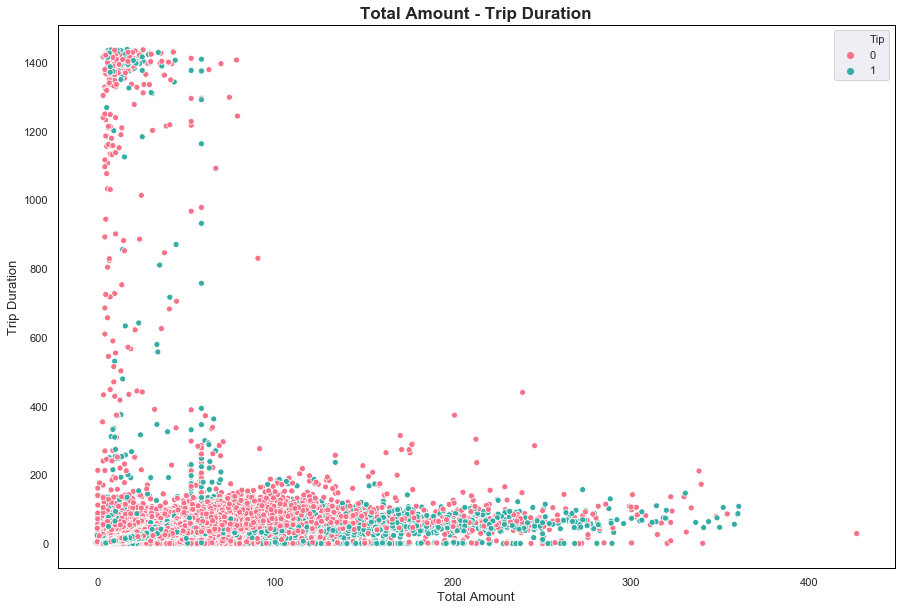

In [79]:

plt.figure(figsize=[15,10])
ax = sns.scatterplot(x="total_amount", y="trip_duration",hue="Tip", palette="husl",data=df)
plt.xlabel("Total Amount",fontsize = 13)
plt.ylabel("Trip Duration",fontsize = 13)
ax.set_facecolor("white")
plt.title("Total Amount - Trip Duration", fontsize=17,weight="bold")
plt.savefig("trip.jpeg", dpi = 500, bbox_inches="tight")

plt.show()

In [80]:
#plt.figure(figsize=[15,7])
#sns.scatterplot(x="pickup_hour", y="trip_duration", hue = "Tip", data=df)

In [81]:
#df.to_csv("taxi.csv")